<a href="https://colab.research.google.com/github/mecan80/DS_projects/blob/master/Insurance_Cust_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Brief

Insurance companies are always updating their customer segments because of the ever changing profile of their customers, the products they offer and the competitive landscape.

##Objectives:
1. Submit a customer segments list using the company's customer data. 
2. Report on any trends, patterns, customer behaviours or interesting facts about the data.


#Loading Libraries and the Dataset

In [1]:
pip install kmodes

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from kmodes.kprototypes import KPrototypes 
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [0]:
insurance_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/insurance.csv')

#Exploring the Data

In [0]:
insurance_df.dtypes

Customer                          object
State                             object
Customer_Lifetime_Value            int64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

In [0]:
insurance_df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6980,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7646,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
insurance_df.shape

(9134, 24)

In [0]:
insurance_df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.945697,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.968043,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.250000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.250000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [0]:
#Checking for null values
insurance_df.isnull().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [0]:
#Checking for count of unique values
insurance_df.nunique()

Customer                         9134
State                               5
Customer_Lifetime_Value          5674
Response                            2
Coverage                            3
Education                           5
Effective_To_Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location_Code                       3
Marital_Status                      3
Monthly_Premium_Auto              202
Months_Since_Last_Claim            36
Months_Since_Policy_Inception     100
Number_of_Open_Complaints           6
Number_of_Policies                  9
Policy_Type                         3
Policy                              9
Renew_Offer_Type                    4
Sales_Channel                       4
Total_Claim_Amount               5106
Vehicle_Class                       6
Vehicle_Size                        3
dtype: int64

In [0]:
insurance_df.groupby(['State']).agg({'Customer':'count', 'Customer_Lifetime_Value':'mean', 'Income': 'mean', 'Number_of_Policies':'sum', 'Number_of_Open_Complaints':'sum', 'Total_Claim_Amount':'mean'}) 

,Customer,Customer_Lifetime_Value,Income,Number_of_Policies,Number_of_Open_Complaints,Total_Claim_Amount
State,,,,,,
Arizona,1703,7861.348209,37405.402231,5224,653,425.361446
California,3150,8003.654921,37558.946667,9348,1205,437.819268
Nevada,882,8056.709751,38369.605442,2449,378,438.750566
Oregon,2601,8077.904652,37557.283353,7735,946,433.012542
Washington,798,8021.474937,38122.733083,2337,329,436.343596


In [0]:
insurance_df.groupby(['State', 'Location_Code']).agg({'Customer':'count', 'Customer_Lifetime_Value':'mean', 'Income': 'mean', 'Number_of_Policies':'sum', 'Number_of_Open_Complaints':'sum', 'Total_Claim_Amount':'mean'}) 

Customer  ...  Total_Claim_Amount
State      Location_Code            ...                    
Arizona    Rural               325  ...          111.922365
           Suburban           1080  ...          546.813183
           Urban               298  ...          327.038712
California Rural               604  ...          109.205737
           Suburban           1997  ...          566.368804
           Urban               549  ...          331.752143
Nevada     Rural               180  ...          110.035198
           Suburban            550  ...          574.076784
           Urban               152  ...          338.351531
Oregon     Rural               513  ...          107.632183
           Suburban           1640  ...          564.842654
           Urban               448  ...          323.009729
Washington Rural               151  ...          115.927512
           Suburban            512  ...          556.720635
           Urban               135  ...          338.193853

[15 rows x 6 columns]

In [0]:
insurance_df.groupby(['Vehicle_Class', 'Vehicle_Size']).agg({'Customer':'count','Customer_Lifetime_Value': 'mean', 'Income': 'mean', 'Number_of_Policies':'sum', 'Total_Claim_Amount':'mean', 'Number_of_Open_Complaints':'sum'})

Customer  ...  Number_of_Open_Complaints
Vehicle_Class Vehicle_Size            ...                           
Four-Door Car Large              475  ...                        231
              Medsize           3237  ...                       1272
              Small              909  ...                        351
Luxury Car    Large               16  ...                          7
              Medsize            106  ...                         46
              Small               41  ...                         15
Luxury SUV    Large               18  ...                          5
              Medsize            125  ...                         33
              Small               41  ...                         27
SUV           Large              167  ...                         59
              Medsize           1308  ...                        462
              Small              321  ...                        127
Sports Car    Large               49  ...                         10
              Medsize            366  ...                        126
              Small               69  ...                         24
Two-Door Car  Large              221  ...                         69
              Medsize           1282  ...                        520
              Small              383  ...                        127

[18 rows x 6 columns]

In [0]:
insurance_df.groupby(['Renew_Offer_Type', 'Response']).agg({'Customer':'count', 'Customer_Lifetime_Value': 'mean', 'Income': 'mean', 'Number_of_Policies':'sum', 'Total_Claim_Amount':'mean', 'Number_of_Open_Complaints':'sum', 'Months_Since_Policy_Inception':'mean'})

Customer  ...  Months_Since_Policy_Inception
Renew_Offer_Type Response            ...                               
Offer1           No            3158  ...                      51.290057
                 Yes            594  ...                      52.252525
Offer2           No            2242  ...                      45.972792
                 Yes            684  ...                      44.991228
Offer3           No            1402  ...                      47.561341
                 Yes             30  ...                      44.000000
Offer4           No            1024  ...                      43.128906

[7 rows x 7 columns]

In [0]:
insurance_df.groupby(['Location_Code', 'EmploymentStatus']).agg({'Customer':'count', 'Customer_Lifetime_Value': 'mean', 'Income': 'mean', 'Number_of_Policies':'sum', 'Number_of_Open_Complaints':'sum', 'Monthly_Premium_Auto':'mean', 'Total_Claim_Amount':'mean'})

Customer  ...  Total_Claim_Amount
Location_Code EmploymentStatus            ...                    
Rural         Disabled                33  ...           94.568548
              Employed              1596  ...          111.351429
              Medical Leave           36  ...           91.057504
              Unemployed             108  ...           99.500188
Suburban      Disabled               341  ...          525.338994
              Employed              2688  ...          519.038851
              Medical Leave          354  ...          531.758497
              Retired                274  ...          496.260544
              Unemployed            2122  ...          636.280379
Urban         Disabled                31  ...          322.477116
              Employed              1414  ...          331.373162
              Medical Leave           42  ...          294.163521
              Retired                  8  ...          272.089073
              Unemployed              87  ...          325.211513

[14 rows x 7 columns]

In [0]:
insurance_df.groupby(['Policy_Type', 'Policy']).agg({'Customer':'count', 'Customer_Lifetime_Value':'mean', 'Income': 'mean', 'Number_of_Policies':'sum', 'Number_of_Open_Complaints':'sum', 'Monthly_Premium_Auto':'mean', 'Total_Claim_Amount':'mean'})

Customer  ...  Total_Claim_Amount
Policy_Type    Policy                  ...                    
Corporate Auto Corporate L1       359  ...          437.787660
               Corporate L2       595  ...          439.183340
               Corporate L3      1014  ...          422.460088
Personal Auto  Personal L1       1240  ...          441.062637
               Personal L2       2122  ...          433.757310
               Personal L3       3426  ...          433.235047
Special Auto   Special L1          66  ...          463.236864
               Special L2         164  ...          432.603295
               Special L3         148  ...          439.041442

[9 rows x 7 columns]

In [0]:
#Converting Date field
insurance_df['Effective_To_Date'] = pd.to_datetime(insurance_df['Effective_To_Date'])
insurance_df['Year_Month'] = insurance_df['Effective_To_Date'].dt.strftime(('%Y-%m'))

In [0]:
insurance_df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Year_Month
0,BU79786,Washington,2764,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02
1,QZ44356,Arizona,6980,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01
2,AI49188,Nevada,12887,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02
3,WW63253,California,7646,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01
4,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2002-03


# Transforming Categorical Data into Numerical Data

In [0]:
insurance_num = ['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount']
insurance_cat_nom = ['State', 'EmploymentStatus', 'Location_Code', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class']
insurance_cat_ord = ['Coverage', 'Education', 'Vehicle_Size', 'Marital_Status', 'Effective_To_Date', 'Year_Month']
insurance_cat_bin = ['Response', 'Gender']

In [0]:
#Using ColumnTransformer
variable_transformer = ColumnTransformer(transformers=[('continuous', 'passthrough', insurance_num),
                                                       ('binary', OrdinalEncoder(), insurance_cat_bin),
                                                       ('ordinal', OrdinalEncoder(), insurance_cat_ord),
                                                       ('nominal', OneHotEncoder(sparse=False), insurance_cat_nom)], 
                                                       remainder='drop')

In [32]:
#Fit the Transformer
variable_transformer.fit(insurance_df)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('continuous', 'passthrough',
                                 ['Customer_Lifetime_Value', 'Income',
                                  'Monthly_Premium_Auto',
                                  'Months_Since_Last_Claim',
                                  'Months_Since_Policy_Inception',
                                  'Number_of_Open_Complaints',
                                  'Number_of_Policies', 'Total_Claim_Amount']),
                                ('binary',
                                 OrdinalEncoder(c...
                                                dtype=<class 'numpy.float64'>),
                                 ['Coverage', 'Education', 'Vehicle_Size',
                                  'Marital_Status', 'Effective_To_Date',
                                  'Year_Month']),
                                ('nominal',
     

In [0]:
#Transform the insurance database
insurance_transformed = variable_transformer.transform(insurance_df)

In [0]:
#Nominal Column headings
nominal_names = variable_transformer.named_transformers_['nominal'].categories_

transformed_nominal_columns = []

for column, name_list in zip(insurance_cat_nom, nominal_names):
  for name in name_list:
    transformed_nominal_columns.append('_'.join([column,str(name)]))

In [0]:
#Column Headings
transformed_columns = insurance_num  + insurance_cat_bin + insurance_cat_ord + transformed_nominal_columns

In [0]:
#Converting back to Dataframe
ins_upd_df = pd.DataFrame(insurance_transformed, columns=transformed_columns)

In [39]:
ins_upd_df.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Response,Gender,Coverage,Education,Vehicle_Size,Marital_Status,Effective_To_Date,Year_Month,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car
0,2764.0,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,0.0,0.0,0.0,0.0,1.0,1.0,54.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6980.0,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,0.0,0.0,1.0,0.0,1.0,2.0,42.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,12887.0,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,0.0,0.0,2.0,0.0,1.0,1.0,49.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7646.0,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,0.0,1.0,0.0,0.0,1.0,1.0,31.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2814.0,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,0.0,1.0,0.0,0.0,1.0,2.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
ins_upd_df.shape

(9134, 55)

#Plotting Numerical Data

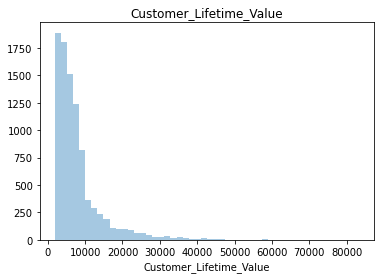

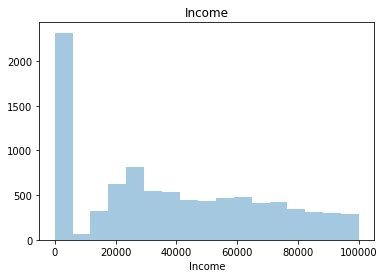

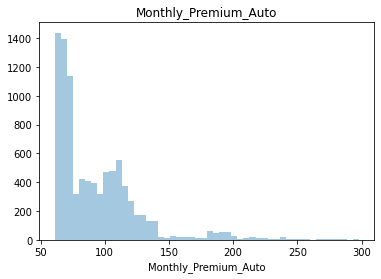

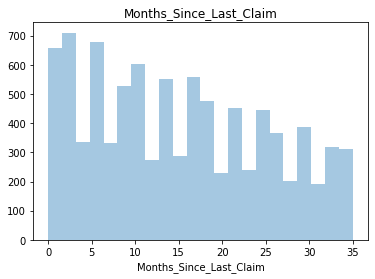

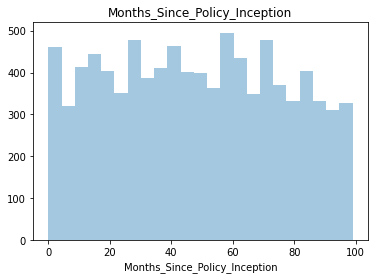

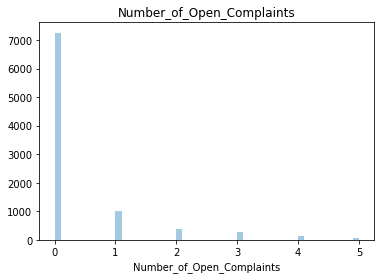

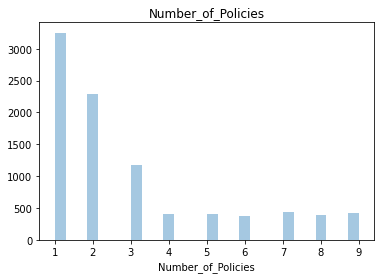

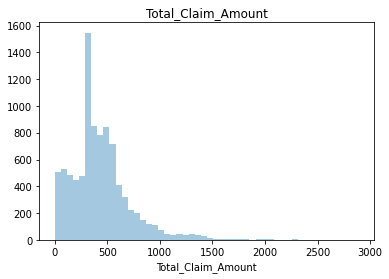

In [43]:
#Plotting numerical data
for column in insurance_num:
  sns.distplot(ins_upd_df[column], kde=False)
  plt.title(f'{column}')
  plt.show()

#Setting up Variables and Variable Combinations

In [44]:
ins_upd_df.columns

Index(['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount',
       'Response', 'Gender', 'Coverage', 'Education', 'Vehicle_Size',
       'Marital_Status', 'Effective_To_Date', 'Year_Month', 'State_Arizona',
       'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Location_Code_Rural',
       'Location_Code_Suburban', 'Location_Code_Urban',
       'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto',
       'Policy_Type_Special Auto', 'Policy_Corporate L1',
       'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1',
       'Policy_Special L2', 'Policy_S

In [0]:
#All Variables
X = ins_upd_df

#All Numerical Variables
X_num = ins_upd_df[insurance_num]

#Geographic Variables
X_geo = ins_upd_df[['State_Arizona', 'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington', 'Location_Code_Rural', 'Location_Code_Suburban', 'Location_Code_Urban']]

#Geographic Variables with CLV
X_geo_clv = ins_upd_df[['Customer_Lifetime_Value', 'State_Arizona', 'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington', 'Location_Code_Rural', 'Location_Code_Suburban', 'Location_Code_Urban']]

#Demographic Variables
X_demo = ins_upd_df[['Education', 'Income', 'Gender', 'Marital_Status', 'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed']]

#Demographic Variables with CLV
X_demo_clv = ins_upd_df[['Customer_Lifetime_Value', 'Education', 'Income', 'Gender', 'Marital_Status', 'EmploymentStatus_Disabled', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed']]

#Behavioral Variables
X_behav = ins_upd_df[['Coverage', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount']]

#Behavioral Variables with CLV
X_behav_clv = ins_upd_df[['Customer_Lifetime_Value', 'Coverage', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount']]

#Psychographic Variables
X_psycho = ins_upd_df[['Vehicle_Size', 'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto', 'Policy_Type_Special Auto', 'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2', 'Policy_Special L3','Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV',
       'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car', 'Vehicle_Class_Two-Door Car' ]]

#Psychographic Variables with CLV
X_psycho_clv = ins_upd_df[['Customer_Lifetime_Value', 'Vehicle_Size', 'Policy_Type_Corporate Auto', 'Policy_Type_Personal Auto', 'Policy_Type_Special Auto', 'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2', 'Policy_Special L3','Vehicle_Class_Four-Door Car', 'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV',
       'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car', 'Vehicle_Class_Two-Door Car' ]]

#Scaling and Transforming the Data

In [0]:
#All Variables
std_scale_all = StandardScaler()
X_scale = std_scale_all.fit_transform(X)

#All Numerical Variables
std_scale_num = StandardScaler()
X_num_scale = std_scale_num.fit_transform(X_num)

#Geographic Variables
std_scale_geo = StandardScaler()
X_geo_scale = std_scale_geo.fit_transform(X_geo)

#Geographic Variables with CLV
std_scale_geo_clv = StandardScaler()
X_geo_clv_scale = std_scale_geo_clv.fit_transform(X_geo_clv)

#Demographic Variables
std_scale_demo = StandardScaler()
X_demo_scale = std_scale_demo.fit_transform(X_demo)

#Demographic Variables with CLV
std_scale_demo_clv = StandardScaler()
X_demo_clv_scale = std_scale_demo_clv.fit_transform(X_demo_clv)

#Behavioral Variables
std_scale_behav = StandardScaler()
X_behav_scale = std_scale_behav.fit_transform(X_behav)

#Behavioral Variables with CLV
std_scale_behav_clv = StandardScaler()
X_behav_clv_scale = std_scale_behav_clv.fit_transform(X_behav_clv)

#Psychographic Variables
std_scale_psycho = StandardScaler()
X_psycho_scale = std_scale_psycho.fit_transform(X_psycho)

#Psychographic Variables with CLV
std_scale_psycho_clv = StandardScaler()
X_psycho_clv_scale = std_scale_psycho_clv.fit_transform(X_psycho_clv)

#Clustering Using KPrototypes

In [58]:
ins_upd_df.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Response,Gender,Coverage,Education,Vehicle_Size,Marital_Status,Effective_To_Date,Year_Month,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car
0,2764.0,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,0.0,0.0,0.0,0.0,1.0,1.0,54.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6980.0,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,0.0,0.0,1.0,0.0,1.0,2.0,42.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,12887.0,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,0.0,0.0,2.0,0.0,1.0,1.0,49.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7646.0,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,0.0,1.0,0.0,0.0,1.0,1.0,31.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2814.0,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,0.0,1.0,0.0,0.0,1.0,2.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#All Variables

#Running KPrototype Clustering, n_clusters=8, init='Cao' - Default
kproto = KPrototypes(n_clusters=8, init='Cao')
clusters = kproto.fit_predict(X_scale, categorical=[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54])

In [60]:
#Checking the cost of the clusters created.
kproto.cost_

85275.49766168809

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

In [62]:
ins_upd_df.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Response,Gender,Coverage,Education,Vehicle_Size,Marital_Status,Effective_To_Date,Year_Month,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,cluster_id
0,2764.0,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,0.0,0.0,0.0,0.0,1.0,1.0,54.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
1,6980.0,0.0,94.0,13.0,42.0,0.0,8.0,1131.464935,0.0,0.0,1.0,0.0,1.0,2.0,42.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
2,12887.0,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,0.0,0.0,2.0,0.0,1.0,1.0,49.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,7646.0,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,0.0,1.0,0.0,0.0,1.0,1.0,31.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
4,2814.0,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,0.0,1.0,0.0,0.0,1.0,2.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5


In [63]:
#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
5,1771
3,1674
6,1667
7,1299
0,1188
4,656
1,513
2,366


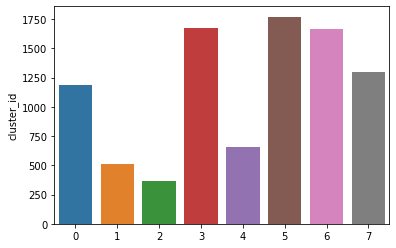

In [64]:
sns.barplot(x=ins_clusters.index, y=ins_clusters['cluster_id']);

In [65]:
ins_upd_df.groupby('cluster_id').mean()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Response,Gender,Coverage,Education,Vehicle_Size,Marital_Status,Effective_To_Date,Year_Month,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car
cluster_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8314.275253,20664.537037,120.306397,14.292088,44.500842,0.162458,2.299663,703.467961,0.202020,0.538721,0.707071,1.467172,1.104377,1.178451,29.988215,19.668350,0.164983,0.364478,0.099327,0.293771,0.077441,0.080808,0.383838,0.088384,0.063973,0.382997,0.026094,0.911616,0.062290,0.211279,0.742424,0.046296,0.032828,0.063973,0.114478,0.136364,0.243266,0.362795,0.010943,0.021886,0.013468,0.557239,0.247475,0.130471,0.064815,0.404040,0.283670,0.184343,0.127946,0.087542,0.005892,0.007576,0.684343,0.153199,0.061448
1,28228.103314,38527.054581,103.196881,15.842105,48.565302,0.241715,2.000000,450.071079,0.152047,0.432749,0.569201,1.639376,1.107212,1.052632,28.132554,18.949318,0.183236,0.329435,0.107212,0.276803,0.103314,0.042885,0.664717,0.054581,0.035088,0.202729,0.202729,0.604288,0.192982,0.200780,0.746589,0.052632,0.044834,0.048733,0.107212,0.118908,0.259259,0.368421,0.007797,0.023392,0.021442,0.436647,0.309942,0.152047,0.101365,0.348928,0.317739,0.198830,0.134503,0.358674,0.013645,0.025341,0.329435,0.101365,0.171540
2,15609.065574,32344.049180,208.046448,15.650273,50.510929,0.357923,3.278689,1227.998856,0.131148,0.549180,0.923497,1.691257,1.117486,1.232240,28.101093,19.254098,0.180328,0.341530,0.090164,0.311475,0.076503,0.054645,0.576503,0.032787,0.019126,0.316940,0.027322,0.882514,0.090164,0.221311,0.743169,0.035519,0.046448,0.076503,0.098361,0.144809,0.204918,0.393443,0.005464,0.013661,0.016393,0.502732,0.226776,0.144809,0.125683,0.393443,0.262295,0.174863,0.169399,0.000000,0.382514,0.418033,0.153005,0.046448,0.000000
3,6258.117682,58174.422342,82.237754,17.412784,22.256272,0.157109,2.026284,279.102364,0.114695,0.444444,0.411589,1.599761,1.053763,0.996416,28.835723,19.151135,0.183393,0.355436,0.103345,0.275388,0.082437,0.017921,0.946834,0.018519,0.015532,0.001195,0.339307,0.396057,0.264636,0.221027,0.740741,0.038232,0.036440,0.074671,0.109916,0.134409,0.234767,0.371565,0.005974,0.018519,0.013740,0.264038,0.410394,0.165472,0.160096,0.356631,0.292712,0.208483,0.142174,0.603345,0.001792,0.001792,0.116487,0.030466,0.246117
4,6198.562500,39405.342988,85.972561,15.201220,48.344512,3.112805,2.890244,379.106137,0.146341,0.471037,0.446646,1.403963,1.059451,1.092988,29.649390,19.425305,0.190549,0.341463,0.112805,0.266768,0.088415,0.045732,0.664634,0.042683,0.025915,0.221037,0.201220,0.623476,0.175305,0.190549,0.760671,0.048780,0.035061,0.044207,0.111280,0.114329,0.251524,0.394817,0.010671,0.018293,0.019817,0.443598,0.283537,0.158537,0.114329,0.402439,0.263720,0.195122,0.138720,0.567073,0.003049,0.003049,0.158537,0.042683,0.225610
5,6018.142857,60153.337662,83.539808,12.587804,73.429701,0.135517,2.033315,272.946975,0.159232,0.434783,0.420102,1.569735,1.087521,0.988142,27.970073,18.823264,0.186335,0.326934,0.101637,0.292490,0.092603,0.022021,0.949746,0.019763,0.005082,0.003388,0.351214,

In [66]:
ins_upd_df.groupby('cluster_id').describe()

Customer_Lifetime_Value                             ... Vehicle_Class_Two-Door Car          
                             count          mean          std  ...                        50%  75%  max
cluster_id                                                     ...                                     
0                           1188.0   8314.275253  3832.483540  ...                        0.0  0.0  1.0
1                            513.0  28228.103314  8982.634164  ...                        0.0  0.0  1.0
2                            366.0  15609.065574  9131.427039  ...                        0.0  0.0  0.0
3                           1674.0   6258.117682  3866.310935  ...                        0.0  0.0  1.0
4                            656.0   6198.562500  3807.468010  ...                        0.0  0.0  1.0
5                           1771.0   6018.142857  3597.872836  ...                        0.0  0.0  1.0
6                           1667.0   5607.887223  3737.849862  ...                        0.0  1.0  1.0
7                           1299.0   6541.227868  1668.675195  ...                        0.0  0.0  1.0

[8 rows x 440 columns]

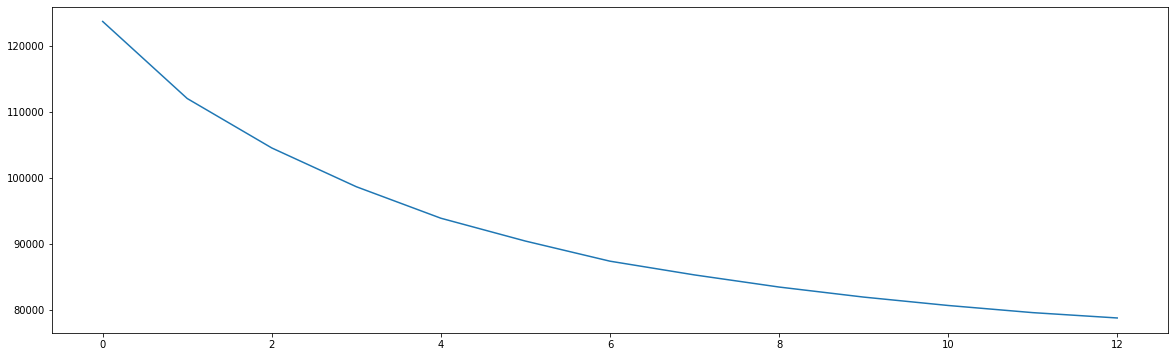

In [67]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(X_scale, categorical=[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54])
    cost.append(kproto.cost_)

plt.figure(figsize=(20,6))   
plt.plot(cost)

In [0]:
#Running KPrototype Clustering, n_clusters=4, init='Cao' 
kproto = KPrototypes(n_clusters=4, init='Cao')
clusters = kproto.fit_predict(X_scale, categorical=[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54])

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

In [70]:
#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
0,4126
3,3260
2,975
1,773


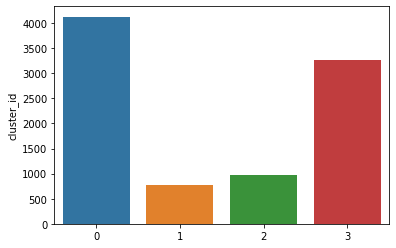

In [71]:
sns.barplot(x=ins_clusters.index, y=ins_clusters['cluster_id']);

In [0]:
#Running KPrototype Clustering, n_clusters=6, init='Cao' 
kproto = KPrototypes(n_clusters=6, init='Cao')
clusters = kproto.fit_predict(X_scale, categorical=[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54])

In [81]:
#Checking the cost of the clusters created.
kproto.cost_

90432.61552413172

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id_all'] = clusters

In [74]:
#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id_all'].value_counts())
ins_clusters

,cluster_id_all
4,3143
1,2596
2,1453
5,739
0,701
3,502


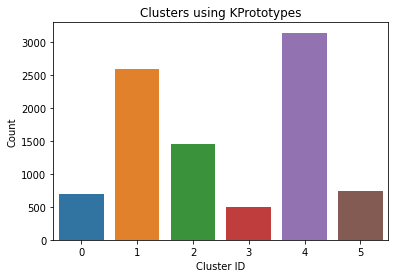

In [78]:
sns.barplot(x=ins_clusters.index, y=ins_clusters['cluster_id_all'])

plt.xlabel('Cluster ID')
plt.ylabel('Count')

plt.title('Clusters using KPrototypes');

In [76]:
ins_upd_df.groupby('cluster_id_all').mean()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Response,Gender,Coverage,Education,Vehicle_Size,Marital_Status,Effective_To_Date,Year_Month,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,cluster_id
cluster_id_all,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6194.753210,39709.881598,85.699001,15.186876,48.881598,3.035663,2.871612,375.523279,0.136947,0.463623,0.433666,1.413695,1.064194,1.098431,29.614836,19.486448,0.191155,0.340942,0.112696,0.266762,0.088445,0.047076,0.659058,0.041369,0.025678,0.226819,0.201141,0.613409,0.185449,0.194009,0.757489,0.048502,0.032810,0.048502,0.112696,0.116976,0.249643,0.390870,0.009986,0.018545,0.019971,0.455064,0.275321,0.158345,0.111270,0.403709,0.258203,0.196862,0.141227,0.566334,0.002853,0.002853,0.164051,0.041369,0.222539,1.011412
1,5993.126733,9380.626348,87.890216,15.155624,48.407935,0.147535,2.008860,521.124693,0.152542,0.533898,0.465716,1.452619,1.099384,1.265794,29.343606,19.348613,0.186826,0.343606,0.090909,0.292373,0.086287,0.087827,0.152157,0.092065,0.067026,0.600924,0.031972,0.929122,0.038906,0.216487,0.746148,0.037365,0.041602,0.065100,0.109784,0.142527,0.233436,0.370185,0.008860,0.017334,0.011171,0.479584,0.275424,0.141757,0.103236,0.383282,0.278120,0.191448,0.147149,0.535439,0.000000,0.000000,0.208012,0.052388,0.204160,2.857473
2,6638.566414,37725.376462,85.991053,15.205781,45.835513,0.179628,7.364074,389.556353,0.140399,0.530626,0.437027,1.615967,1.112182,1.106676,30.160358,19.365451,0.192705,0.350310,0.083276,0.287681,0.086029,0.042670,0.668273,0.052994,0.030282,0.205781,0.185822,0.634549,0.179628,0.229181,0.730902,0.039917,0.036476,0.074329,0.118376,0.150034,0.214040,0.366827,0.003441,0.017206,0.019270,0.452168,0.300069,0.160358,0.087405,0.375086,0.283551,0.198211,0.143152,0.554714,0.000688,0.000688,0.169305,0.052994,0.221610,1.371645
3,14050.655378,30010.197211,192.613546,16.029880,48.764940,0.332669,3.085657,1152.219334,0.119522,0.557769,1.061753,1.659363,1.099602,1.264940,28.545817,19.494024,0.187251,0.344622,0.097610,0.292829,0.077689,0.059761,0.547809,0.027888,0.013944,0.350598,0.029880,0.874502,0.095618,0.203187,0.758964,0.037849,0.039841,0.067729,0.095618,0.139442,0.211155,0.408367,0.005976,0.013944,0.017928,0.480080,0.239044,0.169323,0.111554,0.398406,0.260956,0.177291,0.163347,0.007968,0.290837,0.314741,0.282869,0.097610,0.005976,1.996016
4,5862.838053,61182.290487,84.330894,14.825008,48.736239,0.128540,1.948457,277.867469,0.137448,0.441298,0.410754,1.594337,1.072542,1.001273,28.350620,18.957047,0.183583,0.347439,0.101495,0.280624,0.086860,0.008272,0.979319,0.009863,0.002545,0.000000,0.354120,0.353166,0.292714,0.217626,0.741330,0.041044,0.038816,0.066179,0.112631,0.131085,0.235444,0.374801,0.006682,0.018454,0.015908,0.304804,0.395800,0.164174,0.135221,0.376074,0.285396,0.192491,0.146039,0.564111,0.001591,0.002864,0.153357,0.037226,0.240853,0.099586
5,24479.470907,40051.077131,103.569689,15.115020,47.133965,0.227334,2.018945,448.049505,0.162382,0.442490,0.565629,1.679296,1.100135,1.063599,28.714479,19.247632,0.179973,0.331529,0.105548,0.281461,0.10

In [79]:
ins_upd_df.groupby('cluster_id_all').describe()

Customer_Lifetime_Value                ... cluster_id     
                                 count          mean  ...        75%  max
cluster_id_all                                        ...                
0                                701.0   6194.753210  ...        1.0  3.0
1                               2596.0   5993.126733  ...        3.0  3.0
2                               1453.0   6638.566414  ...        3.0  3.0
3                                502.0  14050.655378  ...        2.0  2.0
4                               3143.0   5862.838053  ...        0.0  3.0
5                                739.0  24479.470907  ...        2.0  3.0

[6 rows x 448 columns]

In [0]:
ins_upd_df.to_csv('insurance_6clusters.csv')

In [0]:
X_geo_clv.head()

,Customer_Lifetime_Value,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban
0,2764,0,0,0,0,1,0,1,0
1,6980,1,0,0,0,0,0,1,0
2,12887,0,0,1,0,0,0,1,0
3,7646,0,1,0,0,0,0,1,0
4,2814,0,0,0,0,1,1,0,0


In [0]:
#Geographic Variables with CLV

#Running KPrototype Clustering, n_clusters=8, init='Cao' - Default
kproto_geo_clv = KPrototypes(n_clusters=8, init='Cao')
clusters = kproto_geo_clv.fit_predict(X_geo_clv_scale, categorical=[1,2,3,4,5,6,7,8])

In [0]:
#Checking the cost of the clusters created.
kproto_geo_clv.cost_

4868.92269889129

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
0,1720
1,1557
6,1430
2,1401
4,1076
7,998
5,704
3,248


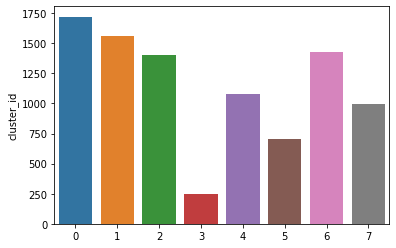

In [0]:
sns.barplot(x=ins_clusters.index, y=ins_clusters['cluster_id']);

In [0]:
ins_upd_df.to_csv('insurance_geo_clv_8.csv')

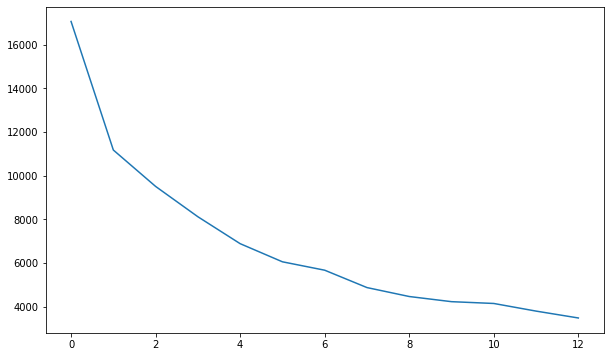

In [0]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto_geo_clv = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto_geo_clv.fit_predict(X_geo_clv_scale, categorical=[1,2,3,4,5,6,7,8])
    cost.append(kproto_geo_clv.cost_)

plt.figure(figsize=(10,6))   
plt.plot(cost)

In [0]:
#Running KPrototype Clustering, n_clusters=5, init='Cao' - Default
kproto_geo_clv = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto_geo_clv.fit_predict(X_geo_clv_scale, categorical=[1,2,3,4,5,6,7,8])

In [0]:
#Checking the cost of the clusters created.
kproto_geo_clv.cost_

7258.916130497372

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
0,2645
3,1951
1,1892
4,1846
2,800


In [0]:
ins_upd_df.to_csv('insurance_geo_clv_5.csv')

In [0]:
X_demo_clv.head()

,Customer_Lifetime_Value,Education,Income,Gender,Marital_Status,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,2764,3,56274,0,1,0,1,0,0,0
1,6980,3,0,0,2,0,0,0,0,1
2,12887,3,48767,0,1,0,1,0,0,0
3,7646,3,0,1,1,0,0,0,0,1
4,2814,3,43836,1,2,0,1,0,0,0


In [0]:
#Demographic Variables with CLV

#Running KPrototype Clustering, n_clusters=5, init='Cao' - Default
kproto_demo_clv = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto_demo_clv.fit_predict(X_demo_clv_scale, categorical=[1,3,4,5,6,7,8,9])

In [0]:
#Checking the cost of the clusters created.
kproto_demo_clv.cost_

12055.22695702087

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
1,2403
3,2109
4,1998
0,1970
2,654


In [0]:
ins_upd_df.to_csv('insurance_demo_clv_5.csv')

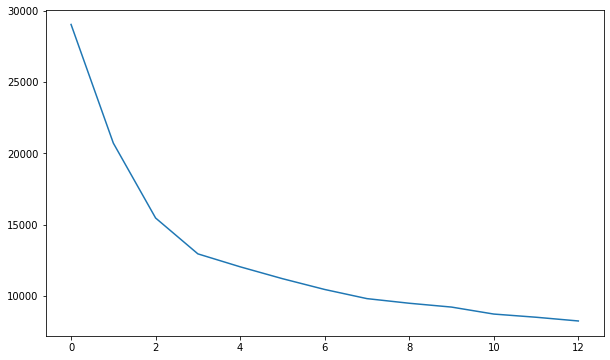

In [0]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto_demo_clv = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto_demo_clv.fit_predict(X_demo_clv_scale, categorical=[1,3,4,5,6,7,8,9])
    cost.append(kproto_demo_clv.cost_)

plt.figure(figsize=(10,6))   
plt.plot(cost)

In [0]:
#Running KPrototype Clustering, n_clusters=3, init='Cao' - Default
kproto_demo_clv = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto_demo_clv.fit_predict(X_demo_clv_scale, categorical=[1,3,4,5,6,7,8,9])

In [0]:
#Checking the cost of the clusters created.
kproto_demo_clv.cost_

15468.997885490098

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
0,5123
1,3259
2,752


In [0]:
ins_upd_df.to_csv('insurance_demo_clv_3.csv')

In [0]:
ins_upd_df.groupby('cluster_id').mean()

,Customer_Lifetime_Value,Coverage,Education,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Vehicle_Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Response,Effective_To_Date,Gender,Marital_Status,Year_Month
cluster_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6429.802069,1.466524,2.396057,57097.762834,90.435097,14.894007,47.843841,0.389420,3.019325,344.193635,1.910014,0.186219,0.344134,0.096818,0.285380,0.087449,0.011321,0.972867,0.011907,0.003904,0.000000,0.283623,0.466133,0.250244,0.218817,0.739606,0.041577,0.035916,0.067343,0.115557,0.136053,0.226820,0.376732,0.007222,0.018153,0.016201,0.337693,0.369510,0.161624,0.131173,0.374976,0.282842,0.201640,0.140543,0.529182,0.012688,0.014445,0.182120,0.044505,0.217060,0.134687,28.769081,0.463791,0.994730,19.157915
1,6290.656643,1.476220,2.129488,6755.245781,92.102792,15.281988,48.477140,0.393065,3.051550,551.557827,1.914698,0.189629,0.347653,0.093587,0.283829,0.085302,0.097269,0.061369,0.100644,0.070881,0.669837,0.052470,0.896594,0.050936,0.212335,0.749310,0.038355,0.042958,0.064130,0.105247,0.136852,0.238724,0.373734,0.006444,0.017490,0.014422,0.519485,0.248236,0.145750,0.086530,0.393679,0.270635,0.180423,0.155262,0.510279,0.014115,0.015342,0.199755,0.057993,0.202516,0.154649,29.546180,0.540963,1.333538,19.325867
2,26164.957447,1.595745,2.243351,39142.718085,117.025266,15.678191,47.780585,0.312500,2.234043,537.415020,1.894947,0.174202,0.337766,0.107713,0.284574,0.095745,0.039894,0.683511,0.057181,0.041223,0.178191,0.198138,0.623670,0.178191,0.206117,0.740691,0.053191,0.046543,0.054521,0.105053,0.128989,0.242021,0.369681,0.010638,0.018617,0.023936,0.437500,0.297872,0.171543,0.093085,0.363032,0.313830,0.191489,0.131649,0.328457,0.069149,0.079787,0.281915,0.089096,0.151596,0.151596,28.909574,0.448138,1.050532,19.268617


In [0]:
X_behav_clv.head()

,Customer_Lifetime_Value,Coverage,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2764,1,69,32,5,0,1,384.811147
1,6980,2,94,13,42,0,8,1131.464935
2,12887,3,108,18,38,0,2,566.472247
3,7646,1,106,18,65,0,7,529.881344
4,2814,1,73,12,44,0,1,138.130879


In [0]:
#Behavioral Variables with CLV

#Running KPrototype Clustering, n_clusters=5, init='Cao' - Default
kproto_behav_clv = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto_behav_clv.fit_predict(X_behav_clv_scale, categorical=[1])

In [0]:
#Checking the cost of the clusters created.
kproto_behav_clv.cost_

38414.5843594864

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
0,3009
1,2877
3,1575
2,915
4,758


In [0]:
ins_upd_df.to_csv('insurance_behav_clv_5.csv')

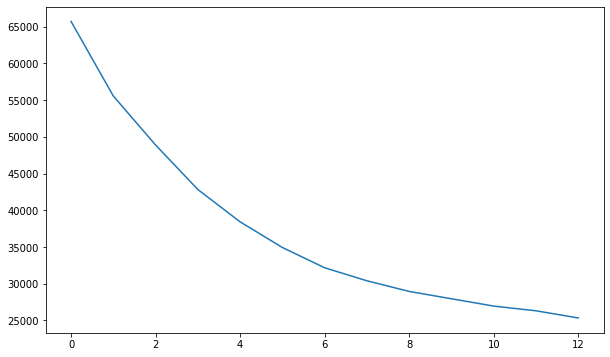

In [0]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto_behav_clv = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto_behav_clv.fit_predict(X_behav_clv_scale, categorical=[1])
    cost.append(kproto_behav_clv.cost_)

plt.figure(figsize=(10,6))   
plt.plot(cost)

In [0]:
X_psycho_clv.head()

,Customer_Lifetime_Value,Vehicle_Size,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Vehicle_Class_Four-Door Car,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car
0,2764,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,6980,2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,12887,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,7646,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2814,2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


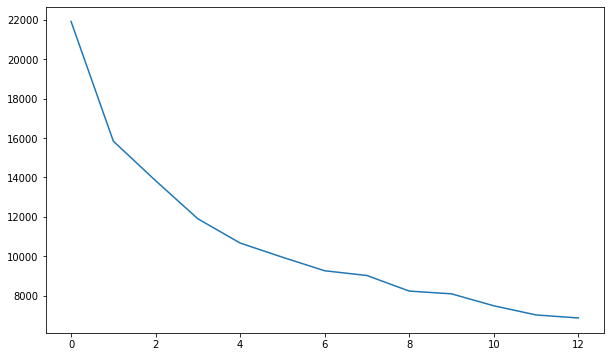

In [0]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto_psycho_clv = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto_psycho_clv.fit_predict(X_psycho_clv_scale, categorical=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
    cost.append(kproto_psycho_clv.cost_)

plt.figure(figsize=(10,6))   
plt.plot(cost)

In [0]:
#Psychographic Variables with CLV

#Running KPrototype Clustering, n_clusters=7, init='Cao' - Default
kproto_psycho_clv = KPrototypes(n_clusters=7, init='Cao')
clusters = kproto_psycho_clv.fit_predict(X_psycho_clv_scale, categorical=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [0]:
#Checking the cost of the clusters created.
kproto_psycho_clv.cost_

9409.280017258387

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
0,2054
5,1981
6,1480
1,1351
3,1151
4,899
2,218


In [0]:
ins_upd_df.to_csv('insurance_psycho_clv_7.csv')

#Final Model - KPrototypes, 6 Clusters, All Variables (still working on this)

In [0]:
pipe_cluster = Pipeline([('scaler', StandardScaler()), ('clf', KPrototypes(n_clusters=6, init='Cao'))])

#Checking PCA

In [0]:
#PCA the data
pca = PCA()

X_scale_pca = pca.fit_transform(X_scale)

In [0]:
x_value = ['PC' + str(number) for number in range(1, pca.n_components_+ 1)]

Text(0, 0.5, 'Explained Variance Ratio')

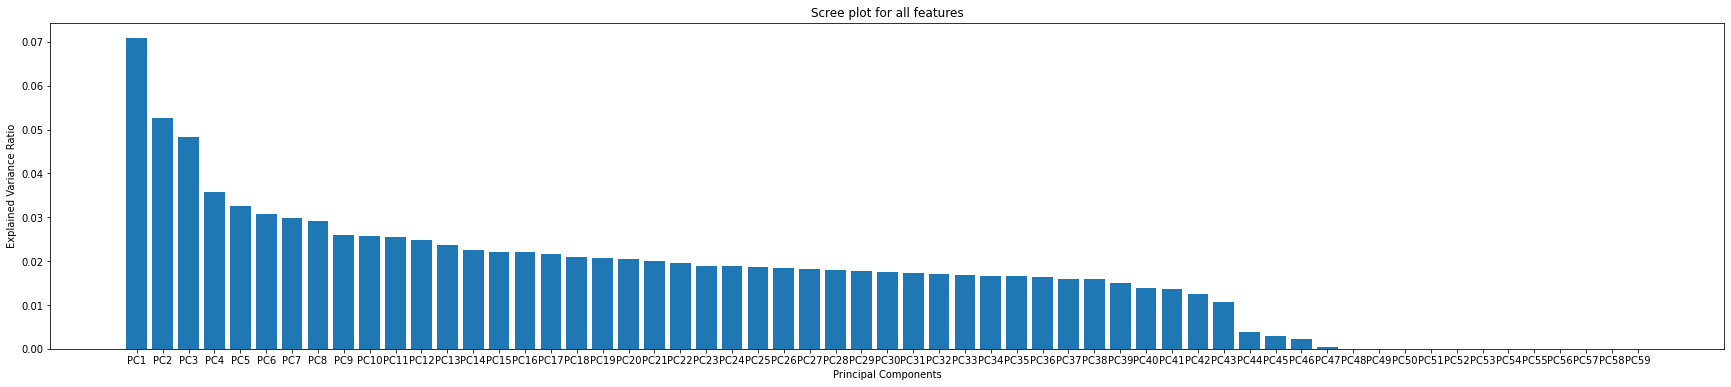

In [0]:
#Plotting the Scree 
plt.figure(figsize=(30,6))   
plt.bar(x_value, pca.explained_variance_ratio_)

plt.title('Scree plot for all features')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

In [0]:
#PCA data to use for plotting

pca_all = PCA(n_components=2)

pca_all.fit(X_scale)

X_all_scale_pca = pca_all.transform(X_scale)

#Testing other Clustering Methods

##Using KMeans only for Numerical Data

In [0]:
#Run KMeans from K from 1 to 9
k_num_range = range(1,10)

#Create KMean lopp using list comprehension
kmeans_all_loop = [KMeans(n_clusters = k_num, random_state=42).fit(X_num_scale) for k_num in k_num_range]

In [0]:
#Get the inertia values out of the models
kmeans_all_inertias = [model.inertia_ for model in kmeans_all_loop]

Text(0.5, 1.0, 'Inertia Plot for Kmeans for Numerical features')

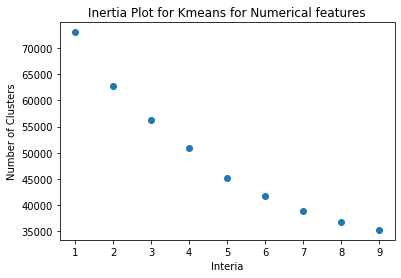

In [89]:
#Plot the inertias

plt.scatter(k_num_range, kmeans_all_inertias)

plt.xlabel('Interia')
plt.ylabel('Number of Clusters')

plt.title('Inertia Plot for Kmeans for Numerical features')

In [0]:
#Choosing 5 as final model
kmeans_all_final = kmeans_all_loop[4]

In [0]:
insurance_num_df = insurance_df[['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount']]


In [99]:
#Get the labels and add it to the dataframe
insurance_num_df['all_labels'] = kmeans_all_final.labels_
insurance_num_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,all_labels
0,2764,56274,69,32,5,0,1,384.811147,2
1,6980,0,94,13,42,0,8,1131.464935,1
2,12887,48767,108,18,38,0,2,566.472247,0
3,7646,0,106,18,65,0,7,529.881344,1
4,2814,43836,73,12,44,0,1,138.130879,2


In [100]:
insurance_num_df.groupby('all_labels').mean()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
all_labels,,,,,,,,
0,6695.921269,14622.915471,87.045774,15.528532,46.930424,0.123589,1.892890,479.774568
1,6620.131875,36219.648774,86.068257,15.249834,46.036448,0.172962,7.345262,396.090221
2,7403.484237,67230.188806,85.193057,14.333688,49.849451,0.134963,1.994332,269.151691
3,19900.209909,29540.920469,169.684485,15.663625,49.604954,0.275098,2.727510,966.697173
4,6624.490765,38178.174142,86.663588,15.196570,48.799472,2.972296,2.749340,387.564236


In [101]:
insurance_num_df.groupby('all_labels').describe()

Customer_Lifetime_Value                ... Total_Claim_Amount             
                             count          mean  ...                75%          max
all_labels                                        ...                                
0                           3277.0   6695.921269  ...         585.600000  1343.619461
1                           1509.0   6620.131875  ...         524.836298  1339.303486
2                           2823.0   7403.484237  ...         377.369958   871.200000
3                            767.0  19900.209909  ...        1246.699280  2893.239678
4                            758.0   6624.490765  ...         489.600000  1386.824722

[5 rows x 64 columns]

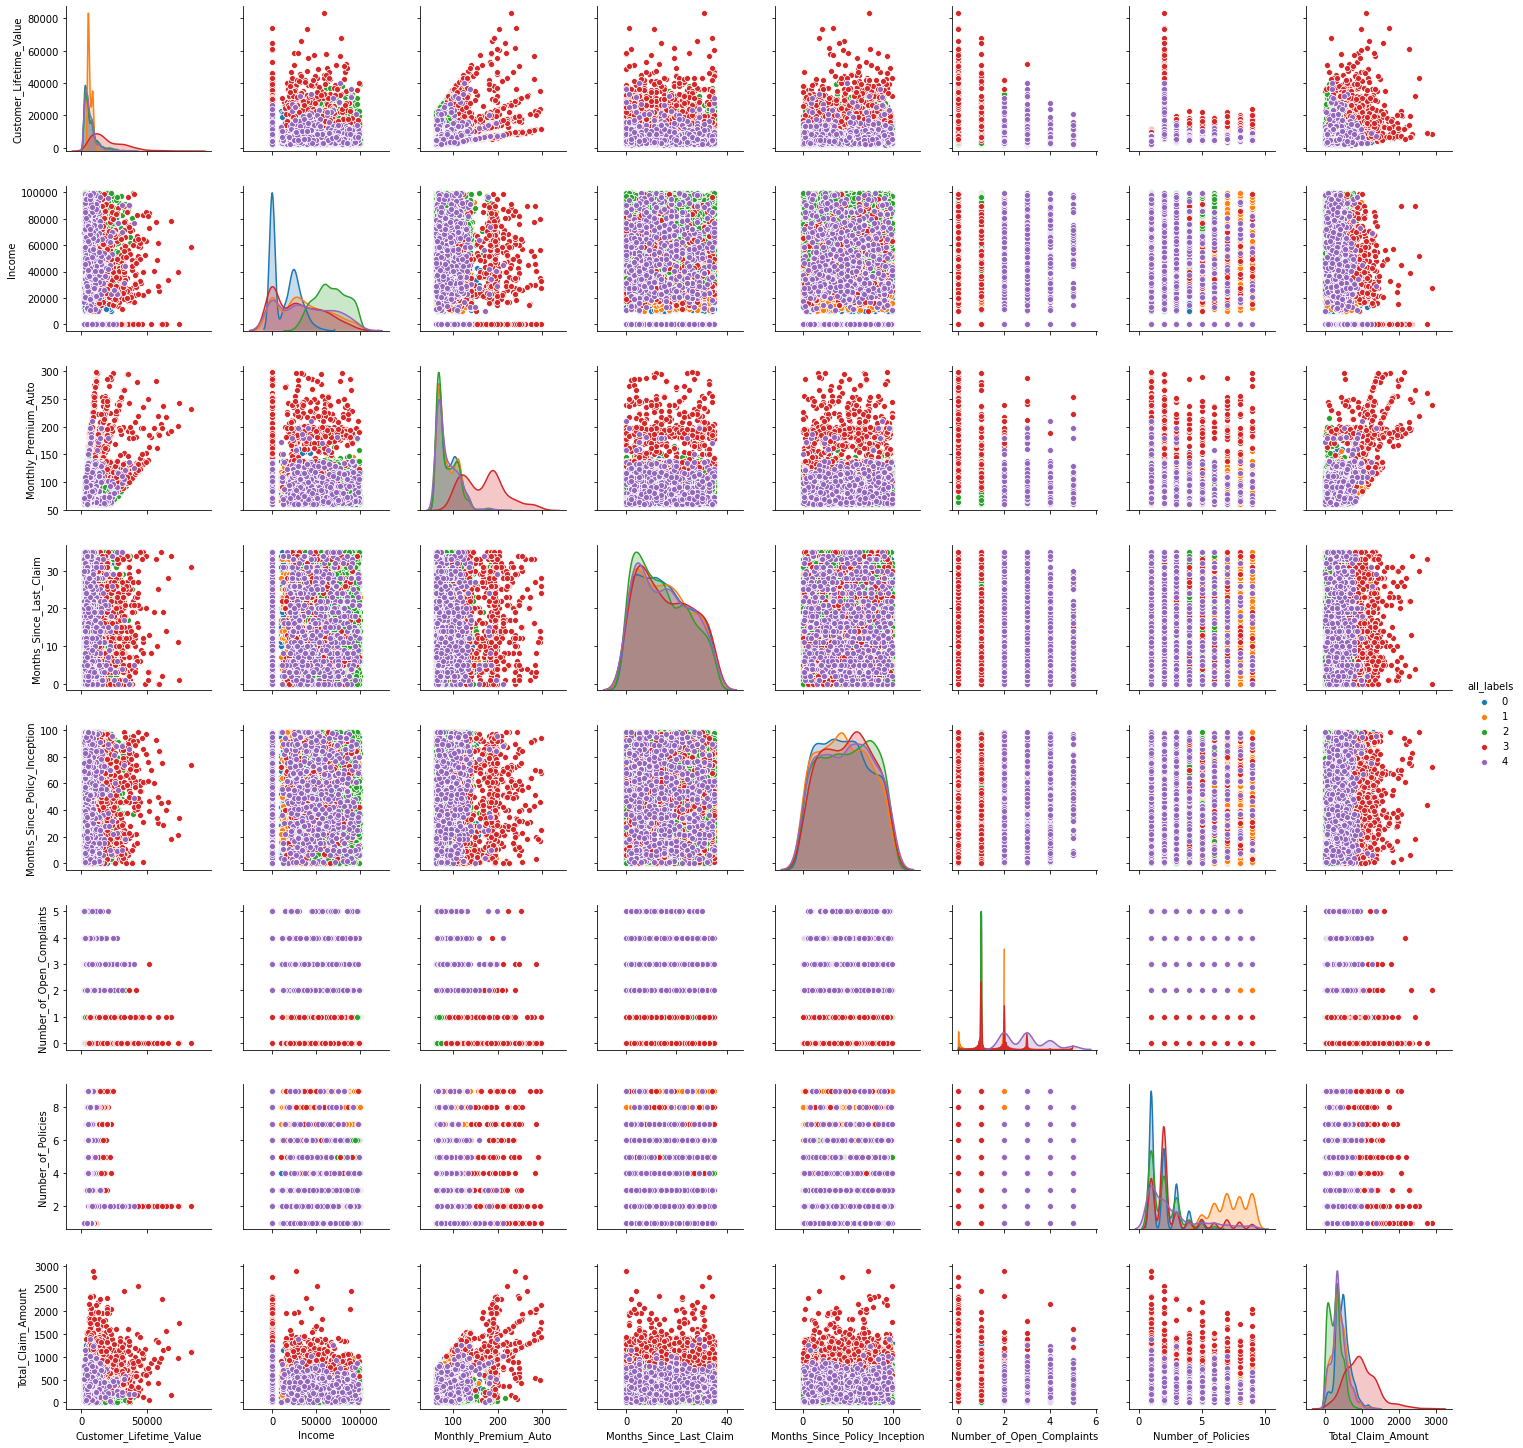

In [102]:
sns.pairplot(insurance_num_df, hue='all_labels')

In [0]:
#Dropping 2 More Variables (Number_of_Open_Complaints, Number of Policies)

In [0]:
#Set the X variable
X_num_2 = insurance_num_df.drop(columns=['Number_of_Open_Complaints', 'Number_of_Policies', 'all_labels'])

In [0]:
#Scale the data
scaler_num_2 = StandardScaler()

scaler_num_2.fit(X_num_2)

#Transform the data
X_num_2_scale = scaler_num_2.transform(X_num_2)

In [0]:
#Run KMeans from K from 1 to 9
k_num_range = range(1,10)

#Create KMean lopp using list comprehension
kmeans_all_loop = [KMeans(n_clusters = k_num, random_state=42).fit(X_num_2_scale) for k_num in k_num_range]

In [0]:
#Get the inertia values out of the models
kmeans_all_inertias = [model.inertia_ for model in kmeans_all_loop]

Text(0.5, 1.0, 'Inertia Plot for Kmeans for Numerical Less 2 features')

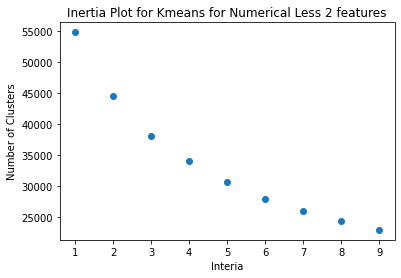

In [107]:
#Plot the inertias

plt.scatter(k_num_range, kmeans_all_inertias)

plt.xlabel('Interia')
plt.ylabel('Number of Clusters')

plt.title('Inertia Plot for Kmeans for Numerical Less 2 features')

In [0]:
#Choosing 3 as final model
kmeans_all_final = kmeans_all_loop[2]

In [109]:
#Get the labels and add it to the dataframe
X_num_2['all_labels_less2'] = kmeans_all_final.labels_
X_num_2.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount,all_labels_less2
0,2764,56274,69,32,5,384.811147,1
1,6980,0,94,13,42,1131.464935,2
2,12887,48767,108,18,38,566.472247,1
3,7646,0,106,18,65,529.881344,2
4,2814,43836,73,12,44,138.130879,1


In [110]:
X_num_2.groupby('all_labels_less2').mean()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
all_labels_less2,,,,,,
0,18879.956522,29701.921527,161.512195,15.165429,49.792153,924.722071
1,7189.025818,66629.338568,84.824594,14.513708,49.288528,272.869813
2,6383.447226,14800.895805,85.808074,15.576680,46.660126,466.346921


In [111]:
X_num_2.groupby('all_labels_less2').describe()

Customer_Lifetime_Value  ... Total_Claim_Amount
                                   count  ...                max
all_labels_less2                          ...                   
0                                  943.0  ...        2893.239678
1                                 3757.0  ...         871.200000
2                                 4434.0  ...        1305.275432

[3 rows x 48 columns]

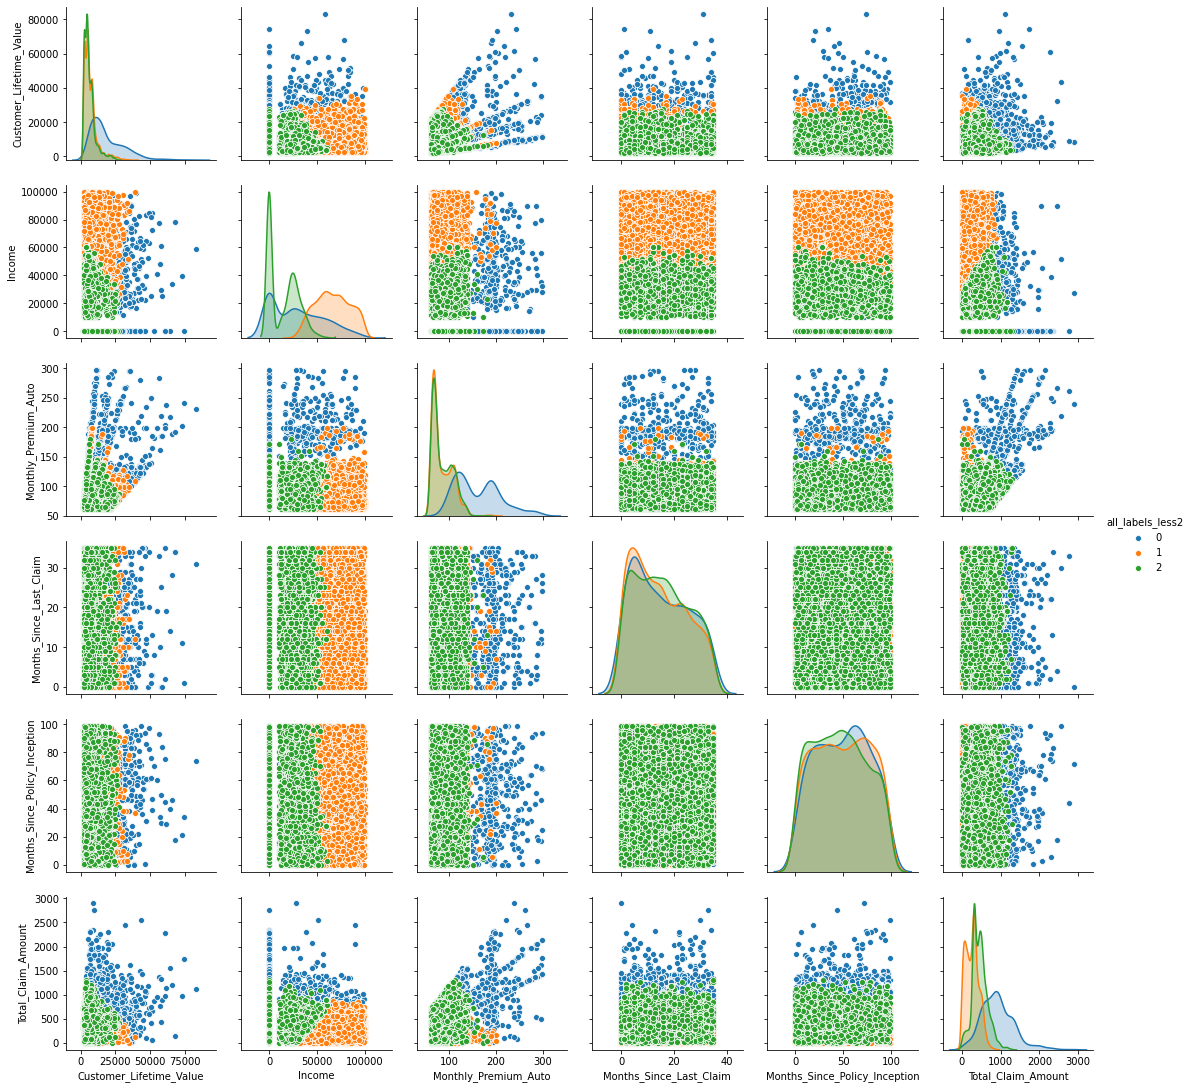

In [112]:
sns.pairplot(X_num_2, hue='all_labels_less2')

**Disregarding the KMeans model results**


##Clustering using DBSCAN

In [0]:
#All Variables

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list = [DBSCAN(metric=metric).fit(X_scale) for metric in metric_list]

In [0]:
#Create list of the labels from the models
db_model_metric_labels = [model.labels_ for model in db_model_metric_list]

In [0]:
#Calculating the silhouette score
silhouette_metric_list = []

for metric, label in zip(metric_list, db_model_metric_labels):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list.append(score)

In [0]:
for metric, score in zip(metric_list, silhouette_metric_list):
  #The 10 after metric is how many space that metric should take up in the string
  print(f'{metric:10}: {score:.3f}')

euclidean : nan
manhattan : nan
cosine    : nan


In [113]:
#All Numerical

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_num = [DBSCAN(metric=metric).fit(X_num_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_num = [model.labels_ for model in db_model_metric_list_num]


#Calculating the silhouette score
silhouette_metric_list_num = []

for metric, label in zip(metric_list, db_model_metric_labels_num):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_num_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_num.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_num):
   print(f'{metric:10}: {score:.3f}')  

euclidean : 0.337
manhattan : 0.980
cosine    : nan


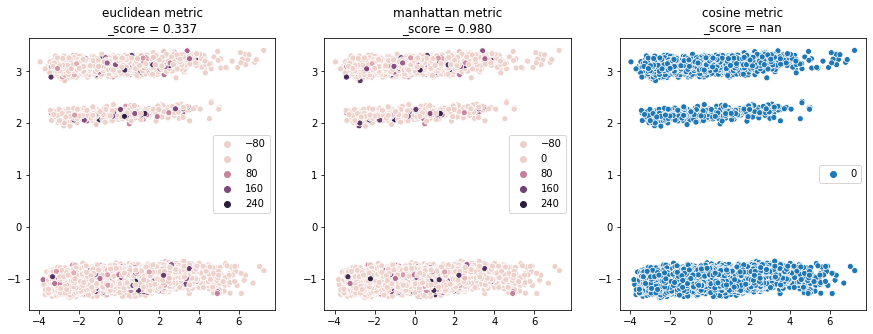

In [0]:
#Plot the labels using PCA coordinates.

#create subplots
fig, axs = plt.subplots(1,3, figsize=(15,5))

for metric, label, score, ax  in zip(metric_list, 
                                     db_model_metric_labels_num, 
                                     silhouette_metric_list_num, 
                                     axs):
  
  sns.scatterplot(X_all_scale_pca[:,0], 
                  X_all_scale_pca[:,1],
                  hue = label,
                  ax=ax)
  
  ax.set_title(f'{metric} metric\n_score = {score:.3f}')

In [114]:
#Geographic Variables

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_geo = [DBSCAN(metric=metric).fit(X_geo_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_geo = [model.labels_ for model in db_model_metric_list_geo]


#Calculating the silhouette score
silhouette_metric_list_geo = []

for metric, label in zip(metric_list, db_model_metric_labels_geo):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_geo_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_geo.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_geo):
   print(f'{metric:10}: {score:.3f}')  

euclidean : 1.000
manhattan : 1.000
cosine    : 0.900


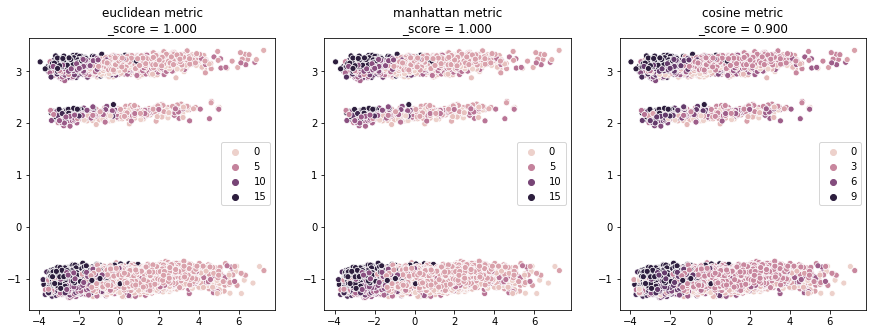

In [0]:
#Plot the labels using PCA coordinates.

#create subplots
fig, axs = plt.subplots(1,3, figsize=(15,5))

for metric, label, score, ax  in zip(metric_list, 
                                     db_model_metric_labels_geo, 
                                     silhouette_metric_list_geo, 
                                     axs):
  
  sns.scatterplot(X_all_scale_pca[:,0], 
                  X_all_scale_pca[:,1],
                  hue = label,
                  ax=ax)
  
  ax.set_title(f'{metric} metric\n_score = {score:.3f}')

In [115]:
#Geographic Variables with CLV

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_geo_clv = [DBSCAN(metric=metric).fit(X_geo_clv_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_geo_clv = [model.labels_ for model in db_model_metric_list_geo_clv]


#Calculating the silhouette score
silhouette_metric_list_geo_clv = []

for metric, label in zip(metric_list, db_model_metric_labels_geo_clv):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_geo_clv_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_geo_clv.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_geo_clv):
   print(f'{metric:10}: {score:.3f}')  

euclidean : 0.752
manhattan : 0.833
cosine    : nan


In [0]:
db_model_metric_labels_geo_clv[1]

array([0, 1, 2, ..., 3, 3, 3])

In [0]:
#Demographic Variables

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_demo = [DBSCAN(metric=metric).fit(X_demo_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_demo = [model.labels_ for model in db_model_metric_list_demo]


#Calculating the silhouette score
silhouette_metric_list_demo = []

for metric, label in zip(metric_list, db_model_metric_labels_demo):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_demo_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_demo.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_demo):
   print(f'{metric:10}: {score:.3f}')  

euclidean : 0.583
manhattan : 0.684
cosine    : 0.218


In [0]:
db_model_metric_labels_demo[1]

array([ 0,  1,  0, ..., 23, 14,  7])

In [0]:
#Demographic Variables with CLV

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_demo_clv = [DBSCAN(metric=metric).fit(X_demo_clv_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_demo_clv = [model.labels_ for model in db_model_metric_list_demo_clv]


#Calculating the silhouette score
silhouette_metric_list_demo_clv = []

for metric, label in zip(metric_list, db_model_metric_labels_demo_clv):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_demo_clv_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_demo_clv.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_demo_clv):
   print(f'{metric:10}: {score:.3f}')  

euclidean : 0.340
manhattan : 0.443
cosine    : 0.115


In [0]:
#Behavioral Variables

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_behav = [DBSCAN(metric=metric).fit(X_behav_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_behav = [model.labels_ for model in db_model_metric_list_behav]


#Calculating the silhouette score
silhouette_metric_list_behav = []

for metric, label in zip(metric_list, db_model_metric_labels_behav):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_behav_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_behav.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_behav):
   print(f'{metric:10}: {score:.3f}')  

euclidean : -0.163
manhattan : 0.261
cosine    : nan


In [0]:
#Behavioral Variables with CLV

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_behav_clv = [DBSCAN(metric=metric).fit(X_behav_clv_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_behav_clv = [model.labels_ for model in db_model_metric_list_behav_clv]


#Calculating the silhouette score
silhouette_metric_list_behav_clv = []

for metric, label in zip(metric_list, db_model_metric_labels_behav_clv):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_behav_clv_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_behav_clv.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_behav_clv):
   print(f'{metric:10}: {score:.3f}')  

euclidean : -0.026
manhattan : 0.493
cosine    : nan


In [0]:
#Psychographic Variables

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_psycho = [DBSCAN(metric=metric).fit(X_psycho_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_psycho = [model.labels_ for model in db_model_metric_list_psycho]


#Calculating the silhouette score
silhouette_metric_list_psycho = []

for metric, label in zip(metric_list, db_model_metric_labels_psycho):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_psycho_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_psycho.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_psycho):
   print(f'{metric:10}: {score:.3f}')  

euclidean : 1.000
manhattan : 1.000
cosine    : 0.068


In [0]:
#Psychographic Variables with CLV

#Make list for distance metric
metric_list = ['euclidean', 'manhattan', 'cosine']

#Creating the list of models
db_model_metric_list_psycho_clv = [DBSCAN(metric=metric).fit(X_psycho_clv_scale) for metric in metric_list]

#Create list of the labels from the models
db_model_metric_labels_psycho_clv = [model.labels_ for model in db_model_metric_list_psycho_clv]


#Calculating the silhouette score
silhouette_metric_list_psycho_clv = []

for metric, label in zip(metric_list, db_model_metric_labels_psycho_clv):
  
  #Try this out to see if it works
  try:
    score = silhouette_score(X_psycho_clv_scale[label != -1], 
                             label[label != -1],
                             metric = metric)
  
  #If an exception is raised
  except:
    score = np.nan
  
  #append the score to the list
  silhouette_metric_list_psycho_clv.append(score)

for metric, score in zip(metric_list, silhouette_metric_list_psycho_clv):
   print(f'{metric:10}: {score:.3f}')  

euclidean : 0.694
manhattan : 0.742
cosine    : 0.065


In [0]:
db_model_metric_labels_psycho_clv[1]

array([ 0,  1,  2, ..., 11, 39,  0])

**For DBScan, the Geographic Variables has the best scores:**

* euclidean : 1.000
* manhattan : 1.000
* cosine    : 0.900

##Clustering using Heirarchical (Agglomerative Clustering)

In [0]:
#All Variables 

#Using the default function
hi_model_all = AgglomerativeClustering()
hi_model_all.fit(X_scale)

#Using Distance Threshold
hi_model_all_dist = AgglomerativeClustering(n_clusters=None, compute_full_tree='auto', distance_threshold=9)
hi_model_all_dist.fit(X_scale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=9, linkage='ward',
                        memory=None, n_clusters=None)

In [0]:
hi_model_all.labels_

array([0, 1, 1, ..., 0, 1, 0])

In [0]:
silhouette_score(X_scale, hi_model_all.labels_, metric='euclidean')

0.10343443816581659

In [0]:
hi_model_all_dist.labels_

array([ 101,  104,  166, ...,  665,   96, 1399])

In [0]:
silhouette_score(X_scale, hi_model_all_dist.labels_, metric='euclidean')

0.11466098416963635

In [0]:
#Numerical Variables

#Using the default function
hi_model_num = AgglomerativeClustering()
hi_model_num.fit(X_num_scale)

#Using Distance Threshold
hi_model_num_dist = AgglomerativeClustering(n_clusters=None, compute_full_tree='auto', distance_threshold=9)
hi_model_num_dist.fit(X_num_scale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=9, linkage='ward',
                        memory=None, n_clusters=None)

In [0]:
silhouette_score(X_num_scale, hi_model_num.labels_, metric='euclidean')

0.1518284849035793

In [0]:
silhouette_score(X_num_scale, hi_model_num_dist.labels_, metric='euclidean')

0.10448677689148406

In [0]:
#Geographic Variables

#Using the default function
hi_model_geo = AgglomerativeClustering()
hi_model_geo.fit(X_geo_scale)

#Using Distance Threshold
hi_model_geo_dist = AgglomerativeClustering(n_clusters=None, compute_full_tree='auto', distance_threshold=9)
hi_model_geo_dist.fit(X_geo_scale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=9, linkage='ward',
                        memory=None, n_clusters=None)

In [0]:
silhouette_score(X_geo_scale, hi_model_geo.labels_, metric='euclidean')

0.28388885382473

In [0]:
silhouette_score(X_geo_scale, hi_model_geo_dist.labels_, metric='euclidean')

0.9999999975233262

In [0]:
hi_model_geo_dist.labels_

array([12,  5,  2, ..., 11, 11, 11])

In [0]:
#Geographic Variables with CLV

#Using the default function
hi_model_geo_clv = AgglomerativeClustering()
hi_model_geo_clv.fit(X_geo_clv_scale)

#Using Distance Threshold
hi_model_geo_clv_dist = AgglomerativeClustering(n_clusters=None, compute_full_tree='auto', distance_threshold=9)
hi_model_geo_clv_dist.fit(X_geo_clv_scale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=9, linkage='ward',
                        memory=None, n_clusters=None)

In [0]:
silhouette_score(X_geo_clv_scale, hi_model_geo_clv.labels_, metric='euclidean')

0.24204412901823708

In [0]:
silhouette_score(X_geo_clv_scale, hi_model_geo_clv_dist.labels_, metric='euclidean')

0.6188147959817816

In [0]:
hi_model_geo_clv_dist.labels_

array([36, 48, 27, ..., 30, 30, 16])

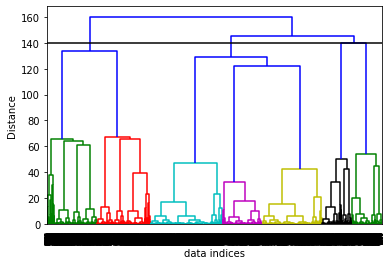

In [0]:
#Plotting the dendogram
#metric = euclidean
#method = ward

sausage_links_geo_clv_dist = linkage(X_geo_clv_scale, metric='euclidean', method='ward')

dendrogram(sausage_links_geo_clv_dist)

plt.ylabel('Distance')
plt.xlabel('data indices')

#add line in where you slice it to different clusters
plt.axhline(140, color = 'k')

In [0]:
#Demographic Variables

#Using the default function
hi_model_demo = AgglomerativeClustering()
hi_model_demo.fit(X_demo_scale)

#Using Distance Threshold
hi_model_demo_dist = AgglomerativeClustering(n_clusters=None, compute_full_tree='auto', distance_threshold=9)
hi_model_demo_dist.fit(X_demo_scale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=9, linkage='ward',
                        memory=None, n_clusters=None)

In [0]:
silhouette_score(X_demo_scale, hi_model_demo.labels_, metric='euclidean')

0.3731315925722883

In [0]:
silhouette_score(X_demo_scale, hi_model_demo_dist.labels_, metric='euclidean')

0.6074426926528564

In [0]:
hi_model_demo_dist.labels_

array([44, 59, 44, ..., 33, 39, 47])

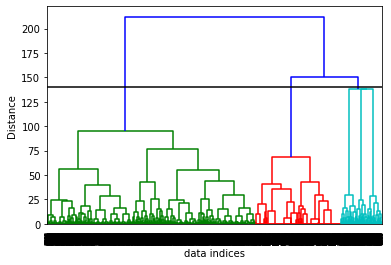

In [0]:
#Plotting the dendogram
#metric = euclidean
#method = ward

sausage_links_demo_dist = linkage(X_demo_scale, metric='euclidean', method='ward')

dendrogram(sausage_links_demo_dist)

plt.ylabel('Distance')
plt.xlabel('data indices')

#add line in where you slice it to different clusters
plt.axhline(140, color = 'k')

In [0]:
#Demographic Variables with CLV

#Using the default function
hi_model_demo_clv = AgglomerativeClustering()
hi_model_demo_clv.fit(X_demo_clv_scale)

#Using Distance Threshold
hi_model_demo_clv_dist = AgglomerativeClustering(n_clusters=None, compute_full_tree='auto', distance_threshold=9)
hi_model_demo_clv_dist.fit(X_demo_clv_scale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=9, linkage='ward',
                        memory=None, n_clusters=None)

In [0]:
silhouette_score(X_demo_clv_scale, hi_model_demo_clv.labels_, metric='euclidean')

0.3383317510222867

In [0]:
silhouette_score(X_demo_clv_scale, hi_model_demo_clv_dist.labels_, metric='euclidean')

0.363175070789692

In [0]:
#Psychographic Variables

#Using the default function
hi_model_psycho = AgglomerativeClustering()
hi_model_psycho.fit(X_psycho_scale)

#Using Distance Threshold
hi_model_psycho_dist = AgglomerativeClustering(n_clusters=None, compute_full_tree='auto', distance_threshold=9)
hi_model_psycho_dist.fit(X_psycho_scale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=9, linkage='ward',
                        memory=None, n_clusters=None)

In [0]:
silhouette_score(X_psycho_scale, hi_model_psycho.labels_, metric='euclidean')

0.3251516552550021

In [0]:
silhouette_score(X_psycho_scale, hi_model_psycho_dist.labels_, metric='euclidean')

0.975043081648752

In [0]:
hi_model_psycho_dist.labels_

array([76, 55, 91, ..., 74, 49, 76])

In [0]:
#Psychographic Variables with CLV

#Using the default function
hi_model_psycho_clv = AgglomerativeClustering()
hi_model_psycho_clv.fit(X_psycho_clv_scale)

#Using Distance Threshold
hi_model_psycho_clv_dist = AgglomerativeClustering(n_clusters=None, compute_full_tree='auto', distance_threshold=9)
hi_model_psycho_clv_dist.fit(X_psycho_clv_scale)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=9, linkage='ward',
                        memory=None, n_clusters=None)

In [0]:
silhouette_score(X_psycho_clv_scale, hi_model_psycho_clv.labels_, metric='euclidean')

0.30693441899653523

In [0]:
silhouette_score(X_psycho_clv_scale, hi_model_psycho_clv_dist.labels_, metric='euclidean')

0.665317864110637

In [0]:
hi_model_psycho_clv_dist.labels_

array([37,  5,  0, ..., 36,  9, 37])

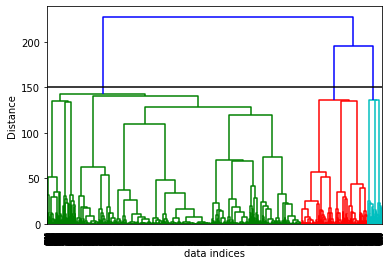

In [0]:
#Plotting the dendogram
#metric = euclidean
#method = ward

sausage_links_psycho_clv_dist = linkage(X_psycho_clv_scale, metric='euclidean', method='ward')

dendrogram(sausage_links_psycho_clv_dist)

plt.ylabel('Distance')
plt.xlabel('data indices')

#add line in where you slice it to different clusters
plt.axhline(150, color = 'k')

**For Agglomerative Clustering, the psychographic variables with Customer Lifetime Value added and using distance threshold seems to have the highest score at:**

0.665317864110637